# Регрессионный анализ
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [494]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [495]:
df = pd.read_csv('SeoulBikeDdata.csv')

In [496]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 8760
Total number of columns in dataset = 14


In [497]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Seasons'] = label_encoder.fit_transform(df['Seasons'])
df['Holiday'] = label_encoder.fit_transform(df['Holiday'])
df['Functioning Day'] = label_encoder.fit_transform(df['Functioning Day'])
df['Date'] = label_encoder.fit_transform(df['Date'])

In [498]:
df.drop('Temperature(°C)', inplace=True, axis=1)
df.drop('Functioning Day', inplace=True, axis=1)
df.drop('Holiday', inplace=True, axis=1)
df.drop('Dew point temperature(°C)', inplace=True, axis=1)
df.drop('Humidity(%)', inplace=True, axis=1)
df.drop('Visibility (10m)', inplace=True, axis=1)
df.drop('Wind speed (m/s)', inplace=True, axis=1)

In [499]:
df.head()

,Date,Rented Bike Count,Hour,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons
0,11,254,0,0.0,0.0,0.0,3
1,11,204,1,0.0,0.0,0.0,3
2,11,173,2,0.0,0.0,0.0,3
3,11,107,3,0.0,0.0,0.0,3
4,11,78,4,0.0,0.0,0.0,3


In [500]:
target_col = "Hour"

In [501]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [502]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [503]:
# X_train = X_train.select_dtypes(exclude=['object'])
X_with_constant = sm.add_constant(X_train)
# X_with_constant = X_with_constant.select_dtypes(exclude=['object'])
model = sm.OLS(y_train, X_with_constant)

In [504]:
results = model.fit()
results.params

const                      7.088916
Date                      -0.001169
Rented Bike Count          0.004757
Solar Radiation (MJ/m2)    0.366815
Rainfall(mm)               0.471542
Snowfall (cm)              0.595159
Seasons                    0.643717
dtype: float64

In [505]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hour   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     245.0
Date:                Tue, 02 May 2023   Prob (F-statistic):          1.56e-281
Time:                        02:00:26   Log-Likelihood:                -19865.
No. Observations:                6132   AIC:                         3.974e+04
Df Residuals:                    6125   BIC:                         3.979e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3:



> Intercept = b0 = 2.7089

>b1 = 0.0441
>b2 = 0.1993
>b3 = 0.0069


2. Коэффициент детерминации R-squared = 0.906, его скорректированная оценка Adj. R-squared = 0.903 - это означает, что регрессионная модель объясняет 90% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 434,5

>расчетный уровень значимости Prob (F-statistic) = 1.88e-69

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b0, b1, b2 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b3 превышает 0.05. Нулевая гипотеза не отвергается. b3 не является значимым.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для b3 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

In [506]:
# X_test = X_test[X_train.columns]
# X_test = sm.add_constant(X_test)
Y_Train_transformed = label_encoder.fit_transform(y_train)
Y_Test_transformed = label_encoder.fit_transform(y_test)
X_test = sm.add_constant(X_test)

In [507]:
y_pred = results.predict(X_test)

In [508]:
residual = y_test - y_pred

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

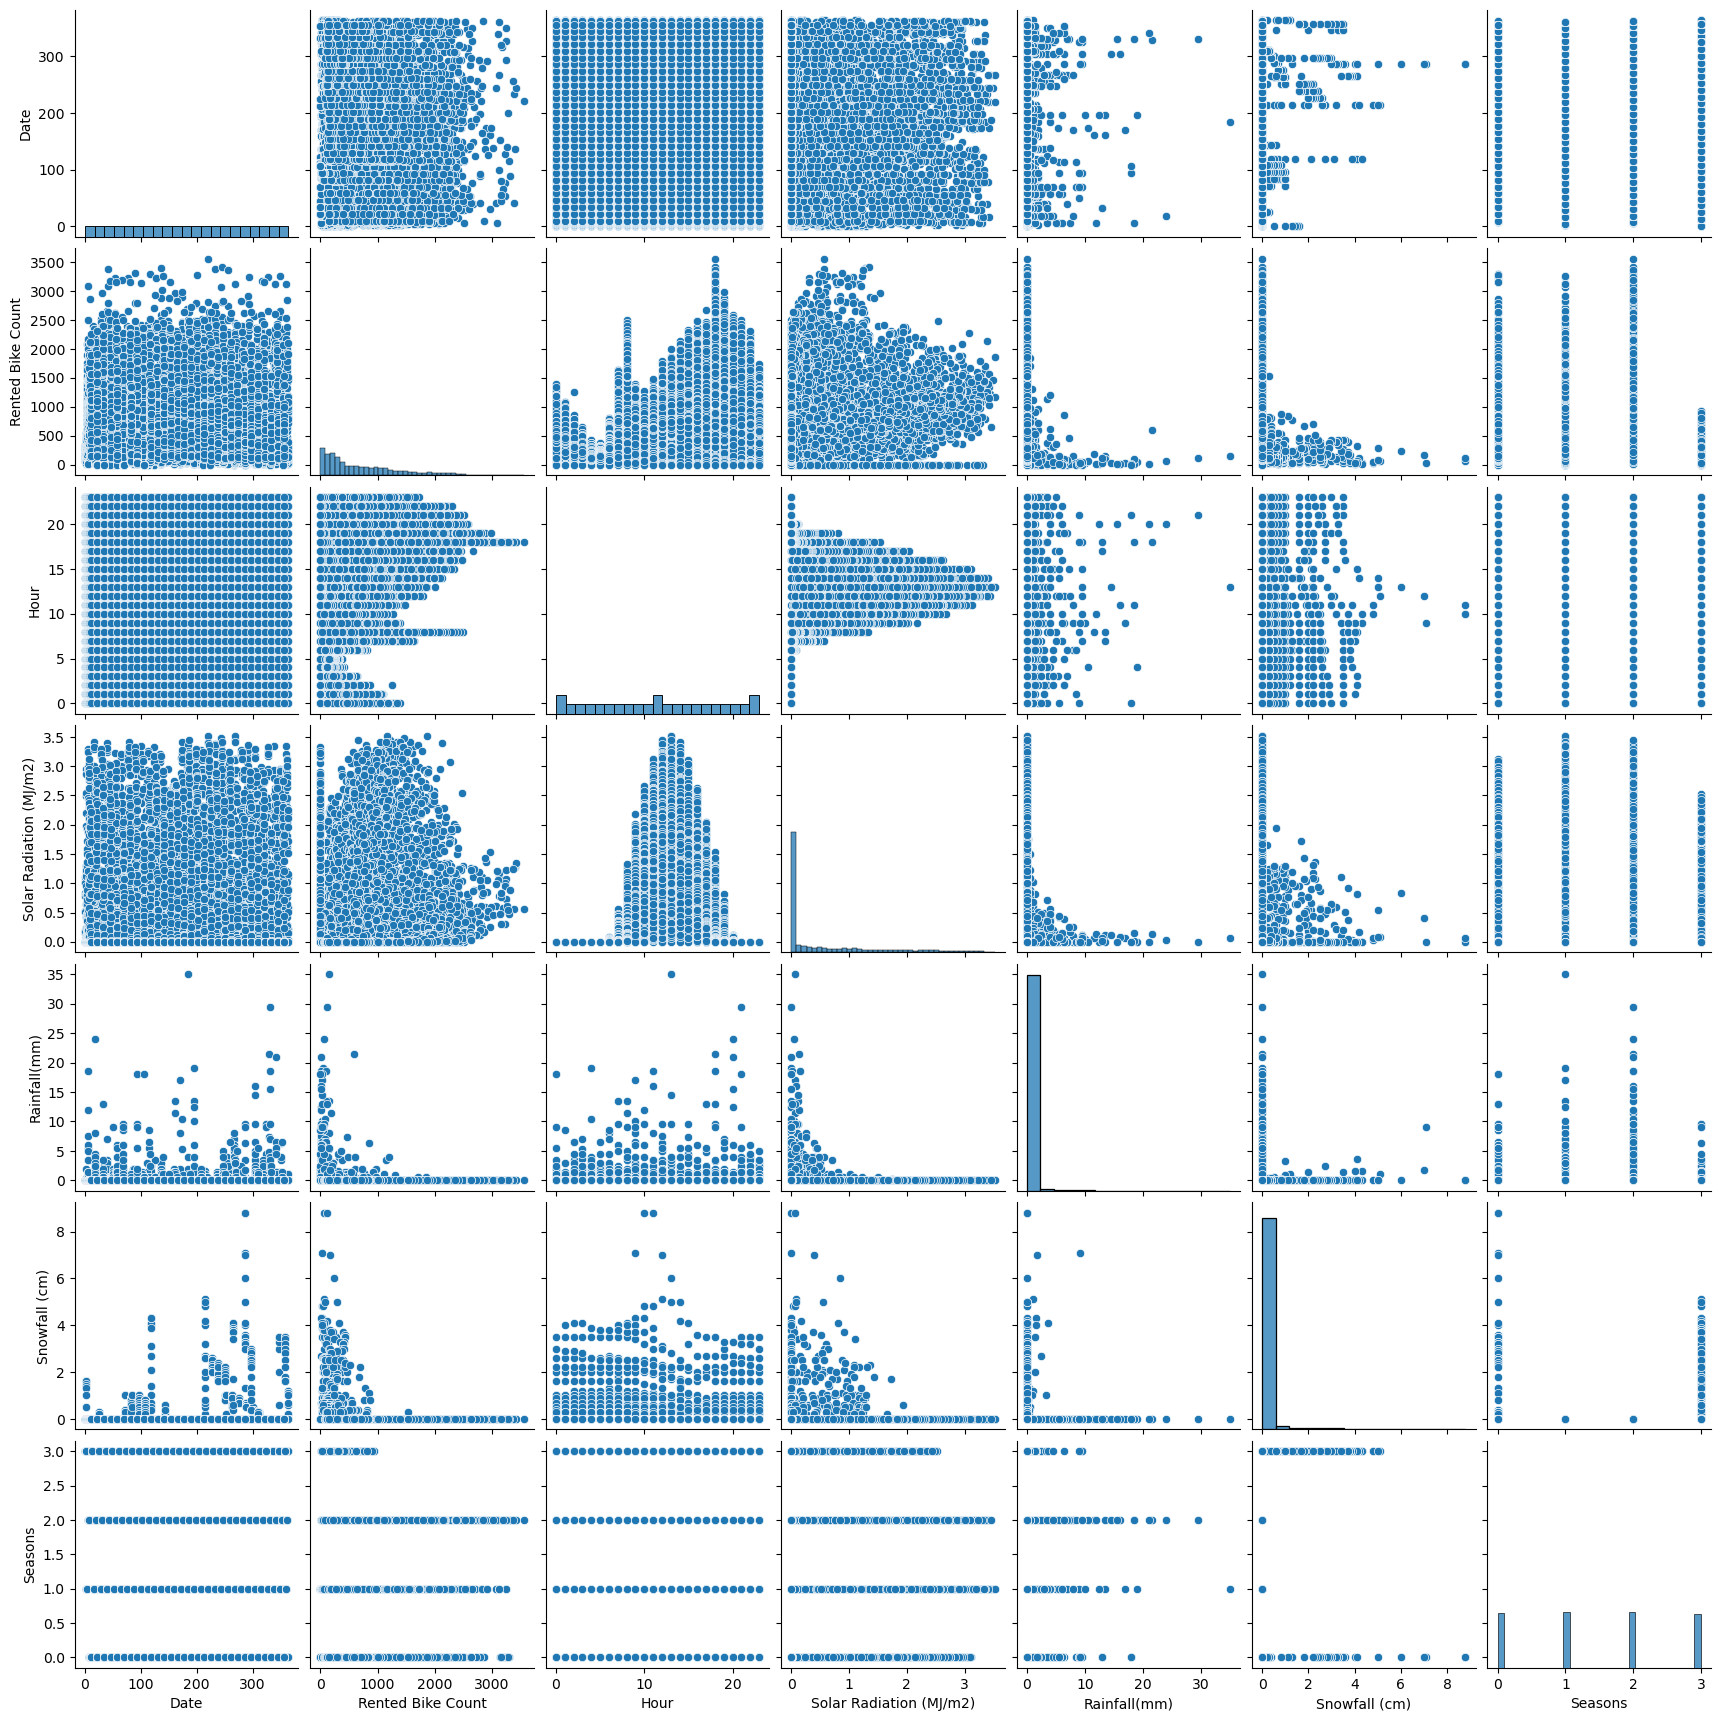

In [509]:
sns.pairplot(df)

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [512]:
cols_num = ['Date','Rented Bike Count', 'Hour','Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)', 'Seasons']

correlation = df.corr().loc[cols_num, cols_num]
correlation

,Date,Rented Bike Count,Hour,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons
Date,1.000000e+00,0.026532,2.083623e-16,-0.004143,-0.001126,0.103662,-1.745374e-02
Rented Bike Count,2.653183e-02,1.000000,4.102573e-01,0.261837,-0.123074,-0.141804,-2.530575e-01
Hour,2.083623e-16,0.410257,1.000000e+00,0.145131,0.008715,-0.021516,-1.747965e-15
Solar Radiation (MJ/m2),-4.143462e-03,0.261837,1.451309e-01,1.000000,-0.074290,-0.072301,-7.581168e-02
Rainfall(mm),-1.125933e-03,-0.123074,8.714642e-03,-0.074290,1.000000,0.008500,-1.929617e-02
Snowfall (cm),1.036623e-01,-0.141804,-2.151645e-02,-0.072301,0.008500,1.000000,1.454573e-01
Seasons,-1.745374e-02,-0.253058,-1.747965e-15,-0.075812,-0.019296,0.145457,1.000000e+00


<Axes: >

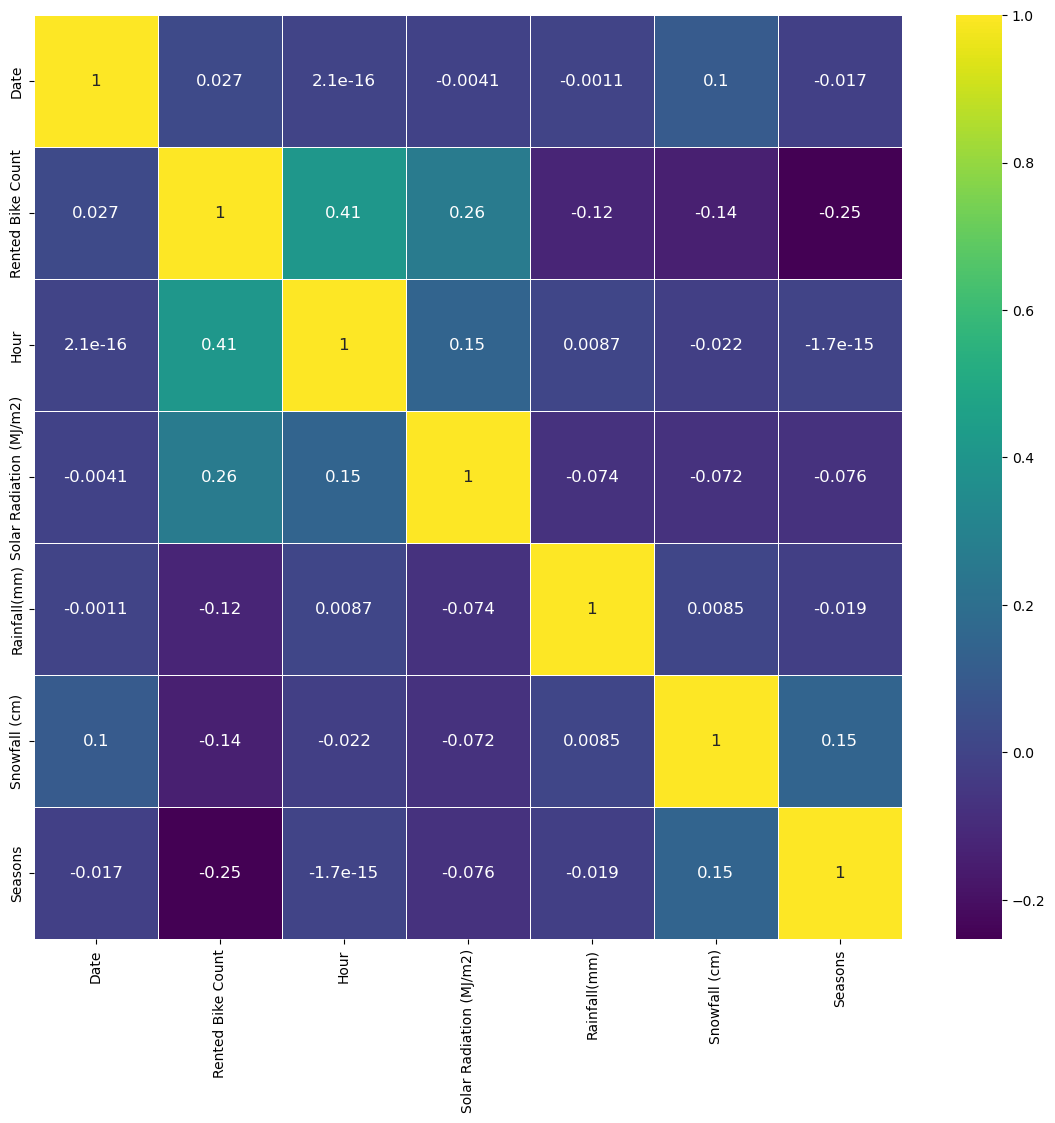

In [513]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

In [514]:
X_train.isnull().sum() 

Date                       0
Rented Bike Count          0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
dtype: int64

In [515]:
X_test.isnull().sum()

const                      0
Date                       0
Rented Bike Count          0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Seasons                    0
dtype: int64

In [516]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Date,Rented Bike Count,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons
vif,2.598502,2.028683,1.51037,1.022484,1.074213,1.966562


# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

<Axes: ylabel='Density'>

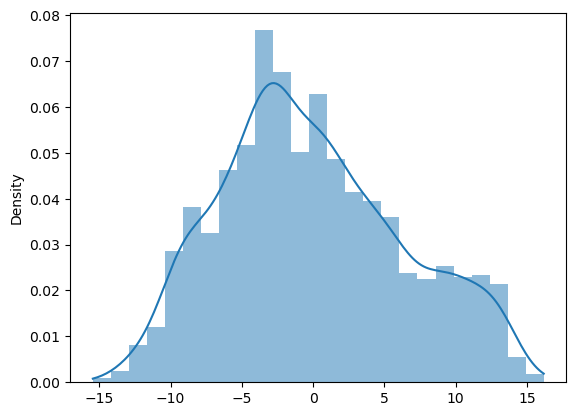

In [517]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

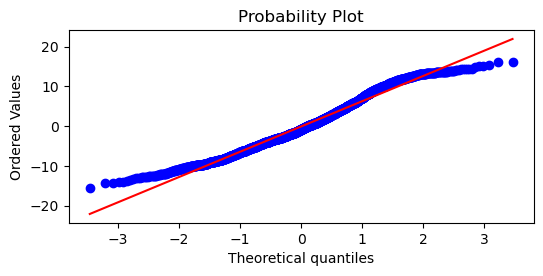

In [518]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [519]:
np.mean(residual)

-0.0478750054958377

# Гомоскедастичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. Предположим, что мы хотим предсказать стоимость квартиры по каким-то ее признакам. Если для квартир площадью 30-50 метров разброс ошибок будет маленький, а для квартир, площадью 50-70 метров разброс ошибок будет очень большой, то мы будем иметь дело с гетероскедастичностью. Такая ситуация нас не устраивает. Нам важно, чтобы качество модели было одно и то же при любых значениях независимой переменной.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

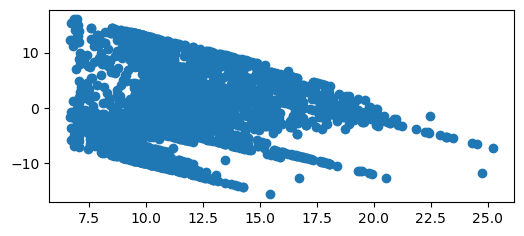

In [520]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

C:\Users\Просто Катя\AppData\Local\Temp\ipykernel_24460\4162568235.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


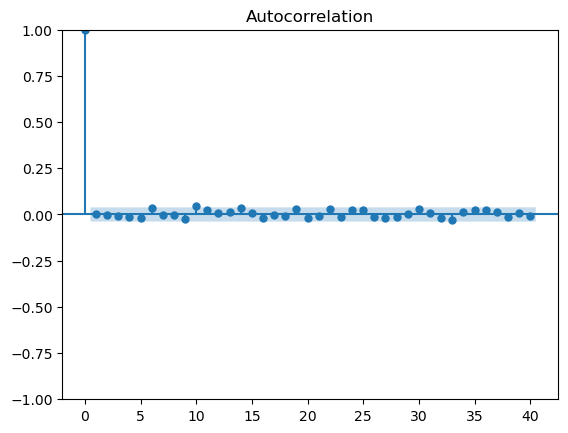

In [521]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()


## Матрицами 

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [522]:
X = sm.add_constant(X_train)

YM = np.matrix(y_train).transpose()
XM = np.matrix(X)
XT = XM.transpose()
XMT = XT.dot(XM)
TMX = np.linalg.inv(XMT)
a = TMX.dot(XT)
b = a.dot(YM)
print(b)


[[ 7.08891563e+00]
 [-1.16891036e-03]
 [ 4.75688465e-03]
 [ 3.66815149e-01]
 [ 4.71542308e-01]
 [ 5.95159349e-01]
 [ 6.43716538e-01]]


## Градиентным спуском  

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [525]:
np.random.seed(42) # для воспроизводимости результатов
𝛽 = np.random.rand(X_train.shape[1])
# Далее реализуем функцию, которая будет выполнять одну итерацию градиентного спуска:

def gradient_descent_step(X, y, 𝛽, learning_rate):
    gradient = 2 * X.T @ (X @ 𝛽 - y.T) / len(y)
    new_𝛽 = 𝛽 - learning_rate * gradient
    return new_𝛽

# Здесь X - матрица объектов-признаков, y - вектор целевых переменных, 𝛽 - вектор коэффициентов линейной регрессии, learning_rate - скорость обучения, которая определяет размер шага на каждой итерации.
# Теперь с помощью функции gradient_descent_step можно реализовать полный алгоритм градиентного спуска:

def gradient_descent(X, y, learning_rate, num_iterations):
    np.random.seed(42)
    𝛽 = np.random.rand(X.shape[1])
    for i in range(num_iterations):
        𝛽 = gradient_descent_step(X, y, 𝛽, learning_rate)
        return 𝛽
# Здесь X - матрица объектов-признаков, y - вектор целевых переменных, learning_rate - скорость обучения, num_iterations - количество итераций алгоритма.
# Также для улучшения качества модели можно провести нормализацию данных:

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
print(gradient_descent(X_train, y_train, 0.01,1000))

Date                       -2765.251721
Rented Bike Count         -18238.729073
Solar Radiation (MJ/m2)      -10.570180
Rainfall(mm)                   0.140387
Snowfall (cm)                 -0.215399
Seasons                      -18.065318
dtype: float64


In [524]:
print(np.matrix(X_train).shape)
print(np.matrix(y_train).shape)

(6132, 6)
(1, 6132)


# Задание
1. Выбрать датасет https://archive-beta.ics.uci.edu/.
2. Проанализировать результаты, полученные с помощью statsmodels (шаги выше).
3. Построить регрессионную зависимость с помощью метода наименьших квадратов, используя вычисление обратной матрицы. 
4. Построить регрессионную зависимость с помощью метода наименьших квадратов, используя метод градиентного спуска (используя приведенные формулы). Сравнить с результатами sklearn.
4. Сравнить и описать результаты.


# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей